# Simple Linear Regression

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

https://en.wikipedia.org/wiki/Simple_linear_regression

$y = mx + c$

$y = 2x + 1$

In [2]:
# An array of x values.
x = np.linspace(0.0, 10.0, 21)

# An array of y values, with noise.
y = 2.0 * x + 1.0 + np.random.normal(0.0, 1.0, x.size)

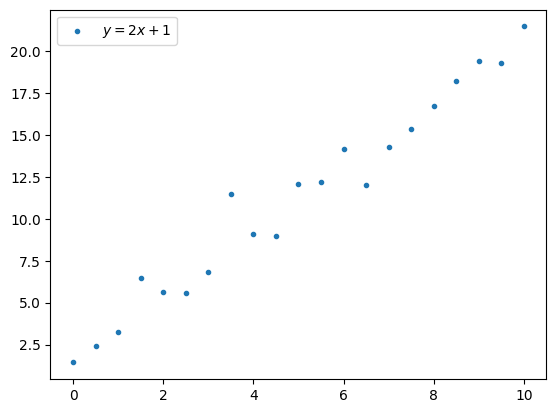

In [3]:
# Create a figure and axis.
fig, ax = plt.subplots()

# Plot the data.
ax.scatter(x, y, marker='.', label='$y = 2x + 1$')

# Add legend.
ax.legend();

In [4]:
# https://github.com/numpy/numpy/blob/v2.2.0/numpy/lib/_polynomial_impl.py#L449-L695

# Polyfit.
np.polyfit(x, y, 1)

array([1.88091246, 1.84836857])

## Calculation From WikiPedia

https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation

In [5]:
# X mean.
xbar = np.mean(x)

# Y mean.
ybar = np.mean(y)

# Numerator.
num = np.sum((x - xbar) * (y - ybar))

# Denominator.
den = np.sum((x - xbar) * (x - xbar))

# Slope.
m = num / den

# Show.
m

np.float64(1.8809124646915645)

In [6]:
# Intercept.
c = ybar - (m * xbar)

# Show.
c

np.float64(1.8483685720275513)

## Without Intercept

https://en.wikipedia.org/wiki/Simple_linear_regression#Simple_linear_regression_without_the_intercept_term_(single_regressor)

$y = mx$

In [7]:
# Bunch of x values.
x = np.linspace(0.0, 10.0, 21)

# Corresponding y values.
y = 3.0 * x + np.random.normal(0.0, 1.0, x.size)

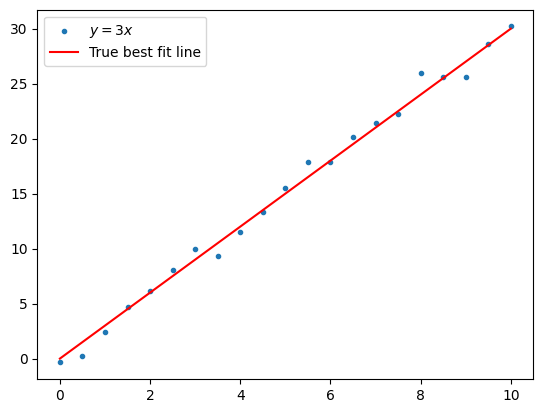

In [8]:
# Plot.
fig, ax = plt.subplots()

# Scatter.
ax.scatter(x, y, marker='.', label='$y = 3x$')

# Add the line that we know should be the best fit.
ax.plot(x, 3.0 * x, 'r', label='True best fit line')

# Legend.
ax.legend();

In [9]:
# Fit.
np.sum(x * y) / np.sum(x * x)

np.float64(3.026947332129289)

## Deriving the Formula

(Not for the faint-hearted.)

$ Cost(m) = \sum_i (y_i - m x_i)^2$

$ \frac{d Cost}{dm} = \sum_i 2 (y_i - mx_i) (-x_i)$

$ \frac{d Cost}{dm} = 2 \sum_i (mx_i^2 - x_iy_i)$

$2 \sum_i (mx_i^2 - x_iy_i) = 0$

$\sum_i (mx_i^2 - x_iy_i) = 0$

$\sum_i mx_i^2 - \sum_i x_iy_i = 0$

$m \sum_i x_i^2 - \sum_i x_iy_i = 0$

$m \sum_i x_i^2 = \sum_i x_iy_i$

$m = \sum_i x_iy_i \div  \sum_i x_i^2$

## Approximating

In [10]:
# X values.
x = np.linspace(0.0, 10.0, 21)

# Y values.
y = 3.0 * x + np.random.normal(0.0, 1.0, x.size)

# Cost function.
def cost(m):
    return np.sum((m * x - y) ** 2)

# Show cost for m = 3.0.
cost(3.0)

np.float64(28.1029736753789)

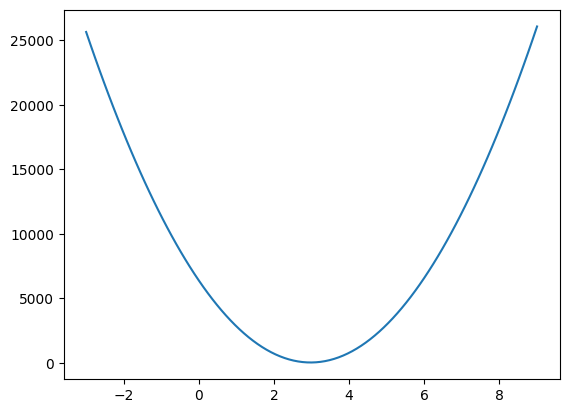

In [11]:
# A range of m values.
m = np.linspace(-3.0, 9.0, 101)

# Calculate the cost function for each m.
costs = np.array([cost(mi) for mi in m])

# Plot the cost function.
fig, ax = plt.subplots()
ax.plot(m, costs);

In [12]:
# Optimize m using a dirty hack.
guess = 1.0

# Learning rate.
alpha = 0.01

# Keep going.
keep_going = True

# No iterations.
iterations = 0

while keep_going:
    iterations += 1
    if cost(guess + alpha) < cost(guess):
        guess += alpha
    elif cost(guess - alpha) < cost(guess):
        guess -= alpha
    else:
        keep_going = False

# Show.
guess, iterations

(2.97999999999998, 199)

In [13]:
# Fit.
np.sum(x * y) / np.sum(x * x)

np.float64(2.9752475108710152)

## Changing m and c

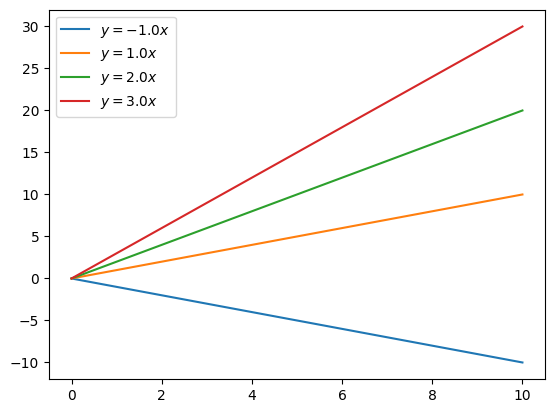

In [14]:
# Comparing different m's (slopes).
fig, ax = plt.subplots()

# Different sloped lines.
ax.plot(x, -1.0 * x, label='$y = -1.0x$')
ax.plot(x, 1.0 * x, label='$y = 1.0x$')
ax.plot(x, 2.0 * x, label='$y = 2.0x$')
ax.plot(x, 3.0 * x, label='$y = 3.0x$')

ax.legend();

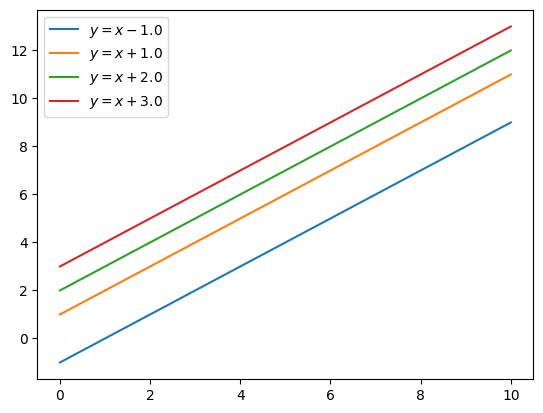

In [15]:
# Comparing different c's (y-intercepts).
fig, ax = plt.subplots()

# Different sloped lines.
ax.plot(x, x - 1.0, label='$y = x - 1.0$')
ax.plot(x, x + 1.0, label='$y = x + 1.0$')
ax.plot(x, x + 2.0, label='$y = x + 2.0$')
ax.plot(x, x + 3.0, label='$y = x + 3.0$')

ax.legend();

## End